In [2]:
%load_ext rpy2.ipython

In [3]:
import os
if not os.path.exists("./new_plots"):
    os.mkdir("./new_plots")

In [4]:
%R library("dplyr"); library("plyr"); library("vegan"); library("Hmisc")


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union

------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:dplyr’:

    arrange, desc, failwith, id, mutate, summarise, summarize

Loading required package: permute
Loading required package: lattice
This is vegan 2.2-0
Loading required package: grid
Loading required package: survival
Loading required package: splines
Loading required package: Formula

Attaching package: ‘Hmisc’

The following objects are masked from ‘package:plyr’:

    is.d

### Putting togehter figure 1: physical data over the course of the time series...

In [5]:
%%R
# note: table put together in All_Integrated_Output.R found within the same folder
d1 <- "/Users/juliambrown/Documents/6thYear/TimeSeries/Summer2014TSAnalysisTime/All_Integrated_Output.csv"
d2 <- "/Users/juliambrown/Documents/6thYear/TimeSeries/Summer2014TSAnalysisTime/esf.meanprecip.csv"

In [6]:
%%R
alldata<-read.table(d1,sep=",",header=TRUE)
alldata$date<-as.Date(alldata$date, "%Y-%m-%d")
precip.esf<-read.table(d2, sep=",",header=TRUE)
alldata<-join(alldata, precip.esf, by=c("Month","Year"))    #joined the precip data with all other data

In [7]:
%%R
##Exclusions:
# Remove October observations
alldata<-alldata[alldata$Month!=10,]
#alldata<-alldata[alldata$Month!=9,]
alldata<-alldata[alldata$Month!=3,]

#making a column of row labels:
alldata$name<-paste(alldata$lake,alldata$date,sep="_")
row.names(alldata)<-alldata$name
alldata$month.day<-alldata$Month+alldata$Day/32   #give each day in month a unique numeric
alldata$lake.year<-paste(alldata$lake, alldata$Year, sep="")
alldata$lake.year<-as.factor(alldata$lake.year)
alldata$Month<-as.factor(alldata$Month)

In [8]:
%%R
###Adjustments### ----

alldata$logcyano<-log(1+alldata$cyano, 10)
alldata$logcyano.sd<-log(1+alldata$cyano.sd,10)
alldata$logbac<-log(1+alldata$bac, 10)
alldata$logbac.sd<-log(1+alldata$bac.sd, 10)
alldata$logvlp<-log(1+alldata$vlp,10)
alldata$logvlp.sd<-log(1+alldata$vlp.sd,10)

alldata$vbr<-alldata$vlp/alldata$bac

In [9]:
%%R
#subsets:
rl.2012<-filter(alldata, lake.year=="RL2012")
gl.2012<-filter(alldata, lake.year=="GL2012")
rl.2013<-filter(alldata, lake.year=="RL2013")
gl.2013<-filter(alldata, lake.year=="GL2013")
gl.all<-filter(alldata, lake=="GL")
rl.all<-filter(alldata, lake=="RL")

In [10]:
%%R
#plot settings:
#lycol=c("green","green","black","black")
#lypch=c(19,17,19,17)
lypch=c(19,17,1,2)
#lycol=c("aquamarine4","aquamarine4","black","black")
lycol=c("black","black","black","black")
lylty=c(1,2,1,2)
mcol=c("green","orange","green","blue","purple")
mcol2=c("firebrick4","darkorange4","forestgreen","navyblue","purple4")
mpch=c(17,19)
ycol=c("green","black")

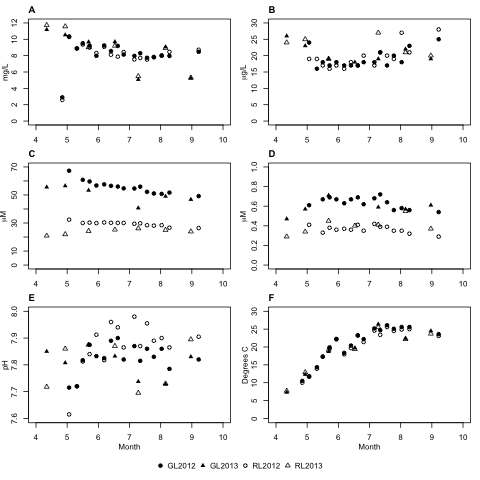

In [11]:
%%R
# Plot physical parameters:

layout(matrix(c(1,2,3,4,5,6,7,7),4, 2, byrow=TRUE),heights=c(15,15,17,3))
par(mar=c(2,3,2,1))
# dissolved oxygen
with(alldata, plot(month.day, do, type="n",xlab="", ylab="", xlim=c(4,10),ylim=c(0,12)))
with(alldata, points(month.day, do, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="A", adj = 0)
title(ylab="mg/L", line=2)

# soluble reactive phosphate
with(alldata, plot(month.day, 1000*srp, type="n",xlab="", ylab="", xlim=c(4,10), ylim=c(0,30)))
with(alldata, points(month.day, 1000*srp, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="B", adj = 0)
title(ylab=expression(paste(mu,"g/L")), line=2)

# Nitrate
with(alldata, plot(month.day, nitrate, type="n",xlab="", ylab="",xlim=c(4,10),ylim=c(0,70)))
with(alldata, points(month.day, nitrate, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="C", adj = 0)
title(ylab=expression(paste(mu,"M")), line=2)

# Nitrite
with(alldata, plot(month.day, nitrite, type="n",xlab="", ylab="",xlim=c(4,10),ylim=c(0,1)))
with(alldata, points(month.day, nitrite, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="D", adj = 0)
title(ylab=expression(paste(mu,"M")), line=2)

par(mar=c(3,3,2,1))
# pH
with(alldata, plot(month.day, pH, type="n",xlab="", ylab="",xlim=c(4, 10),ylim=c(7.6,8)))
with(alldata, points(month.day, pH, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="E", adj = 0)
title(ylab="pH", line=2)
title(xlab="Month", line=2)

# surface temp
with(alldata, plot(month.day, temp, type="n",xlab="", ylab="",xlim=c(4, 10),ylim=c(0,30)))
with(alldata, points(month.day, temp, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="F", adj = 0)
title(ylab="Degrees C", line=2)
title(xlab="Month", line=2)

par(mar=c(0,0,0,0))
plot.new()
with(alldata, legend('center','groups', legend=levels(lake.year), pch=lypch,col=lycol, bty="n",ncol=4))

In [12]:
%%R
## Plot physical parameters:

png("./new_plots/TS.physparms.png",    # create PNG        
    width = 5*200,        # 5 x 300 pixels
    height = 1000,
    res = 200)            # 300 pixels per inch


layout(matrix(c(1,2,3,4,5,6,7,7),4, 2, byrow=TRUE),heights=c(15,15,17,3))
par(mar=c(2,3,2,1))

# dissolved oxygen
with(alldata, plot(month.day, do, type="n",xlab="", ylab="", xlim=c(4,10),ylim=c(0,12)))
with(alldata, points(month.day, do, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="A", adj = 0)
title(ylab="mg/L", line=2)

# soluble reactive phosphate
with(alldata, plot(month.day, 1000*srp, type="n",xlab="", ylab="", xlim=c(4,10), ylim=c(0,30)))
with(alldata, points(month.day, 1000*srp, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="B", adj = 0)
title(ylab=expression(paste(mu,"g/L")), line=2)

# Nitrate
with(alldata, plot(month.day, nitrate, type="n",xlab="", ylab="",xlim=c(4,10),ylim=c(0,70)))
with(alldata, points(month.day, nitrate, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="C", adj = 0)
title(ylab=expression(paste(mu,"M")), line=2)

# Nitrite
with(alldata, plot(month.day, nitrite, type="n",xlab="", ylab="",xlim=c(4,10),ylim=c(0,1)))
with(alldata, points(month.day, nitrite, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="D", adj = 0)
title(ylab=expression(paste(mu,"M")), line=2)

par(mar=c(3,3,2,1))
# pH
with(alldata, plot(month.day, pH, type="n",xlab="", ylab="",xlim=c(4, 10),ylim=c(7.6,8)))
with(alldata, points(month.day, pH, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="E", adj = 0)
title(ylab="pH", line=2)
title(xlab="Month", line=2)

# surface temp
with(alldata, plot(month.day, temp, type="n",xlab="", ylab="",xlim=c(4, 10),ylim=c(0,30)))
with(alldata, points(month.day, temp, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="F", adj = 0)
title(ylab="Degrees C", line=2)
title(xlab="Month", line=2)

par(mar=c(0,0,0,0))
plot.new()
with(alldata, legend('center','groups', legend=levels(lake.year), pch=lypch,col=lycol, bty="n",ncol=4))
dev.off()

quartz_off_screen 
                2 


In [13]:
!open ./new_plots/TS.physparms.png -a Preview

### Adding precipitation and temperature data to this plot array

In [14]:
%%R
esf <- read.table(d2, sep=",", header=TRUE)
head(esf)

  Year Month  TPCP
1 2011    11  77.9
2 2011    12  65.7
3 2012     1 104.3
4 2012     2  37.3
5 2012     3  62.3
6 2012     4  60.3


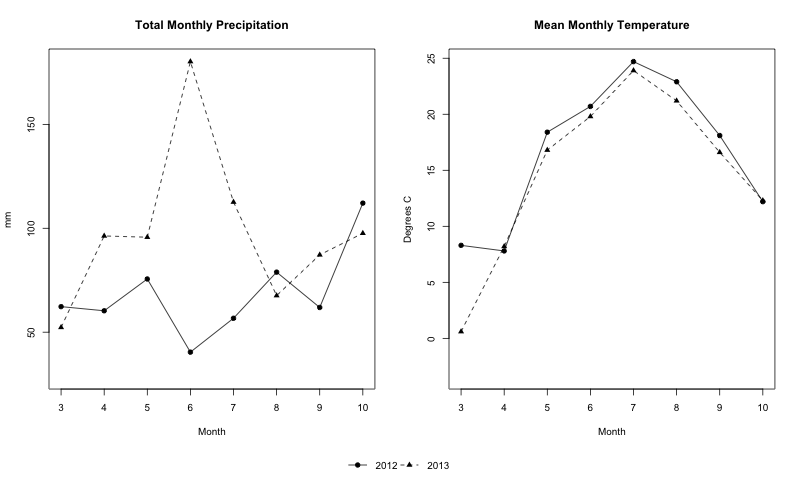

In [15]:
%%R -w 800
syr<-read.table("../Summer2014TSAnalysisTime/SyracuseNYNOAAWeatherHistory.csv",sep=",",header=TRUE)

syr$DATE<-as.character(syr$DATE)
syr$DATE<-as.Date(syr$DATE,"%Y%m%d")


#looks like SUNY ESF is the closest station with all the needed data
syr.esf<-filter(syr,STATION=="GHCND:USC00308386")



syr.esf$Month<-c(11,12,1:12,1:10)
syr.esf$Year<-c(2011,2011,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2012,2013,2013,2013,2013,2013,2013,2013,2013,2013,2013)

# Put temperatures in degrees celcius
syr.esf$MMXT<-syr.esf$MMXT/10
syr.esf$MMNT<-syr.esf$MMNT/10
syr.esf$MNTM<-syr.esf$MNTM/10

#Put precipitation in mm instead of 10th of mm
syr.esf$TPCP<-syr.esf$TPCP/10

layout(matrix(c(1,2,3,3),2,2,byrow=TRUE),heights=c(15,1))
with(syr.esf, plot(Month,TPCP,type="n", xlim=c(3,10),xlab="Month",ylab="mm",main="Total Monthly Precipitation"))
with(syr.esf[5:12,], lines(Month,TPCP,col="black")) 
with(syr.esf[5:12,], points(Month,TPCP,col="black",pch=19))
with(syr.esf[17:24,], lines(Month, TPCP, col="black",lty=2))
with(syr.esf[17:24,], points(Month, TPCP, col="black", pch=17))
with(syr.esf, plot(Month,MNTM,type="n", xlim=c(3,10),xlab="Month",ylab="Degrees C",main="Mean Monthly Temperature"))
with(syr.esf[5:12,], lines(Month,MNTM,col="black")) 
with(syr.esf[5:12,], points(Month,MNTM,col="black",pch=19))
with(syr.esf[17:24,], lines(Month, MNTM, col="black",lty=2))
with(syr.esf[17:24,], points(Month, MNTM, col="black", pch=17))
par(mar=c(0,0,0,0))
plot.new()
legend('center','groups',c(2012,2013),pch=c(19,17),
       col=c("black","black"),lty=c(1,2),ncol=2,bty ="n")

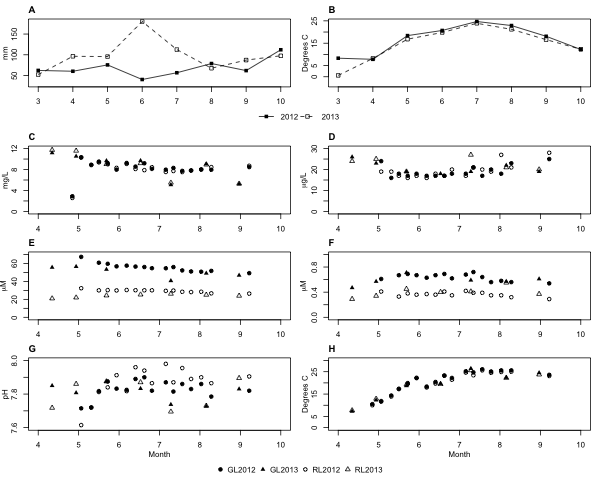

In [16]:
%%R -w 600
# Plot physical parameters:

layout(matrix(c(1,2,10,10,3,4,5,6,7,8,9,9),6, 2, byrow=TRUE),heights=c(15,3,15,15,17,3))
par(mar=c(2,3,2,1))

# monthly preciptation
with(syr.esf, plot(Month,TPCP,type="n", xlim=c(3,10),xlab="",ylab=""))
with(syr.esf[5:12,], lines(Month,TPCP,col="black")) 
with(syr.esf[5:12,], points(Month,TPCP,col="black",pch=15))
with(syr.esf[17:24,], lines(Month, TPCP, col="black",lty=2))
with(syr.esf[17:24,], points(Month, TPCP, col="black", pch=0))
title(main="A", adj = 0)
title(ylab="mm", line=2)

# monthly air temp
with(syr.esf, plot(Month,MNTM,type="n", xlim=c(3,10),xlab="Month",ylab="Degrees C"))
with(syr.esf[5:12,], lines(Month,MNTM,col="black")) 
with(syr.esf[5:12,], points(Month,MNTM,col="black",pch=15))
with(syr.esf[17:24,], lines(Month, MNTM, col="black",lty=2))
with(syr.esf[17:24,], points(Month, MNTM, col="black", pch=0))
title(main="B", adj = 0)
title(ylab="Degrees C", line=2)

# dissolved oxygen
with(alldata, plot(month.day, do, type="n",xlab="", ylab="", xlim=c(4,10),ylim=c(0,12)))
with(alldata, points(month.day, do, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="C", adj = 0)
title(ylab="mg/L", line=2)

# soluble reactive phosphate
with(alldata, plot(month.day, 1000*srp, type="n",xlab="", ylab="", xlim=c(4,10), ylim=c(0,30)))
with(alldata, points(month.day, 1000*srp, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="D", adj = 0)
title(ylab=expression(paste(mu,"g/L")), line=2)

# Nitrate
with(alldata, plot(month.day, nitrate, type="n",xlab="", ylab="",xlim=c(4,10),ylim=c(0,70)))
with(alldata, points(month.day, nitrate, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="E", adj = 0)
title(ylab=expression(paste(mu,"M")), line=2)

# Nitrite
with(alldata, plot(month.day, nitrite, type="n",xlab="", ylab="",xlim=c(4,10),ylim=c(0,1)))
with(alldata, points(month.day, nitrite, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="F", adj = 0)
title(ylab=expression(paste(mu,"M")), line=2)

par(mar=c(3,3,2,1))
# pH
with(alldata, plot(month.day, pH, type="n",xlab="", ylab="",xlim=c(4, 10),ylim=c(7.6,8)))
with(alldata, points(month.day, pH, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="G", adj = 0)
title(ylab="pH", line=2)
title(xlab="Month", line=2)

# surface temp
with(alldata, plot(month.day, temp, type="n",xlab="", ylab="",xlim=c(4, 10),ylim=c(0,30)))
with(alldata, points(month.day, temp, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="H", adj = 0)
title(ylab="Degrees C", line=2)
title(xlab="Month", line=2)

par(mar=c(0,0,0,0))
plot.new()
with(alldata, legend('center','groups', legend=levels(lake.year), pch=lypch,col=lycol, bty="n",ncol=4))

plot.new()
legend('center','groups',c(2012,2013),pch=c(15,0),
       col=c("black","black"),lty=c(1,2),ncol=2,bty ="n")

In [17]:
%%R -w 600
# Plot physical parameters with precipitation and air temp:

png("./new_plots/TS.physparms_expanded.png",    # create PNG        
    width = 5*200,        # 5 x 300 pixels
    height = 1200,
    res = 200)            # 300 pixels per inch

layout(matrix(c(1,2,10,10,3,4,5,6,7,8,9,9),6, 2, byrow=TRUE),heights=c(15,3,15,15,17,3))
par(mar=c(2,3,2,1))

# monthly preciptation
with(syr.esf, plot(Month,TPCP,type="n", xlim=c(3,10),xlab="",ylab=""))
with(syr.esf[5:12,], lines(Month,TPCP,col="black")) 
with(syr.esf[5:12,], points(Month,TPCP,col="black",pch=15))
with(syr.esf[17:24,], lines(Month, TPCP, col="black",lty=2))
with(syr.esf[17:24,], points(Month, TPCP, col="black", pch=0))
title(main="A", adj = 0)
title(main="precipitation", adj = 1)
title(ylab="mm", line=2)

# monthly air temp
with(syr.esf, plot(Month,MNTM,type="n", xlim=c(3,10),xlab="Month",ylab="Degrees C"))
with(syr.esf[5:12,], lines(Month,MNTM,col="black")) 
with(syr.esf[5:12,], points(Month,MNTM,col="black",pch=15))
with(syr.esf[17:24,], lines(Month, MNTM, col="black",lty=2))
with(syr.esf[17:24,], points(Month, MNTM, col="black", pch=0))
title(main="B", adj = 0)
title(main="air temp", adj = 1)
title(ylab="Degrees C", line=2)

# dissolved oxygen
with(alldata, plot(month.day, do, type="n",xlab="", ylab="", xlim=c(4,10),ylim=c(0,12)))
with(alldata, points(month.day, do, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="C", adj = 0)
title(main="d.o.", adj = 1)
title(ylab="mg/L", line=2)

# soluble reactive phosphate
with(alldata, plot(month.day, 1000*srp, type="n",xlab="", ylab="", xlim=c(4,10), ylim=c(0,30)))
with(alldata, points(month.day, 1000*srp, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="D", adj = 0)
title(main="srp", adj = 1)
title(ylab=expression(paste(mu,"g/L")), line=2)

# Nitrate
with(alldata, plot(month.day, nitrate, type="n",xlab="", ylab="",xlim=c(4,10),ylim=c(0,70)))
with(alldata, points(month.day, nitrate, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="E", adj = 0)
title(main="nitrate", adj = 1)
title(ylab=expression(paste(mu,"M")), line=2)

# Nitrite
with(alldata, plot(month.day, nitrite, type="n",xlab="", ylab="",xlim=c(4,10),ylim=c(0,1)))
with(alldata, points(month.day, nitrite, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="F", adj = 0)
title(main="nitrite", adj=1)
title(ylab=expression(paste(mu,"M")), line=2)

par(mar=c(3,3,2,1))
# pH
with(alldata, plot(month.day, pH, type="n",xlab="", ylab="",xlim=c(4, 10),ylim=c(7.6,8)))
with(alldata, points(month.day, pH, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="G", adj = 0)
title(main="pH", adj = 1)
title(ylab="pH", line=2)
title(xlab="Month", line=2)

# surface temp
with(alldata, plot(month.day, temp, type="n",xlab="", ylab="",xlim=c(4, 10),ylim=c(0,30)))
with(alldata, points(month.day, temp, col=lycol[lake.year], pch=lypch[lake.year]))
title(main="H", adj = 0)
title(main="surface temp", adj = 1)
title(ylab="Degrees C", line=2)
title(xlab="Month", line=2)

par(mar=c(0,0,0,0))
plot.new()
with(alldata, legend('center','groups', legend=levels(lake.year), pch=lypch,col=lycol, bty="n",ncol=4))

plot.new()
legend('center','groups',c(2012,2013),pch=c(15,0),
       col=c("black","black"),lty=c(1,2),ncol=2,bty ="n")

dev.off()

quartz_off_screen 
                2 


In [18]:
!open ./new_plots/TS.physparms_expanded.png -a Preview

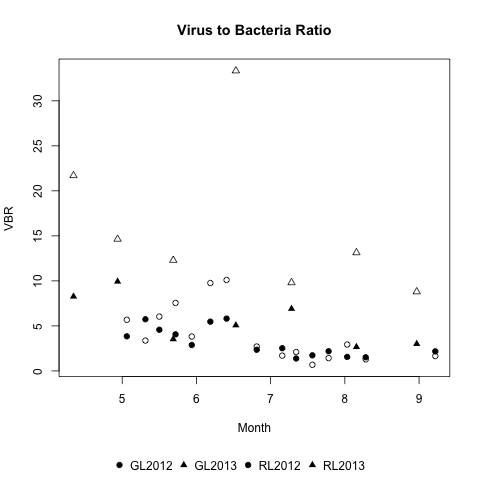

In [19]:
%%R
#VBR:
layout(matrix(c(1,2),2,1,byrow=TRUE),height=15,1)
with(alldata, plot(month.day, vbr, type="n", xlab="Month",ylab="VBR"))
with(alldata, points(month.day, vbr, col=lycol[lake.year],pch=lypch[lake.year]))
title(main="Virus to Bacteria Ratio")
par(mar=c(0,0,0,0))
plot.new()
with(alldata, legend('center','groups', legend=levels(lake.year), pch=c(19,17,19,17),col=c("black","black","black","black"), bty="n",ncol=4))


In [20]:
%%R
#Plot of couts data:
#first plot the abundance without any transformations:
# Viruses, Bacteria, Virus to Bacteria plot:
r12bac<-filter(alldata, lake.year=="RL2012")
r12bac<-na.omit(r12bac[,c("month.day","bac","bac.sd")])
g12bac<-filter(alldata, lake.year=="GL2012")
g12bac<-na.omit(g12bac[,c("month.day","bac","bac.sd")])
r13bac<-filter(alldata, lake.year=="RL2013")
r13bac<-na.omit(r13bac[,c("month.day","bac","bac.sd")])
g13bac<-filter(alldata, lake.year=="GL2013")
g13bac<-na.omit(g13bac[,c("month.day","bac","bac.sd")])
r12vlp<-filter(alldata, lake.year=="RL2012")
r12vlp<-na.omit(r12vlp[,c("month.day","vlp","vlp.sd")])
g12vlp<-filter(alldata, lake.year=="GL2012")
g12vlp<-na.omit(g12vlp[,c("month.day","vlp","vlp.sd")])
r13vlp<-filter(alldata, lake.year=="RL2013")
r13vlp<-na.omit(r13vlp[,c("month.day","vlp","vlp.sd")])
g13vlp<-filter(alldata, lake.year=="GL2013")
g13vlp<-na.omit(g13vlp[,c("month.day","vlp","vlp.sd")])
r12cyano<-filter(alldata, lake.year=="RL2012")
r12cyano<-na.omit(r12cyano[,c("month.day","cyano","cyano.sd")])
g12cyano<-filter(alldata, lake.year=="GL2012")
g12cyano<-na.omit(g12cyano[,c("month.day","cyano","cyano.sd")])
r13cyano<-filter(alldata, lake.year=="RL2013")
r13cyano<-na.omit(r13cyano[,c("month.day","cyano","cyano.sd")])
g13cyano<-filter(alldata, lake.year=="GL2013")
g13cyano<-na.omit(g13cyano[,c("month.day","cyano","cyano.sd")])
r12logcyano<-filter(alldata, lake.year=="RL2012")
r12logcyano<-na.omit(r12logcyano[,c("month.day","logcyano","logcyano.sd")])
g12logcyano<-filter(alldata, lake.year=="GL2012")
g12logcyano<-na.omit(g12logcyano[,c("month.day","logcyano","logcyano.sd")])
r13logcyano<-filter(alldata, lake.year=="RL2013")
r13logcyano<-na.omit(r13logcyano[,c("month.day","logcyano","logcyano.sd")])
g13logcyano<-filter(alldata, lake.year=="GL2013")
g13logcyano<-na.omit(g13logcyano[,c("month.day","logcyano","logcyano.sd")])


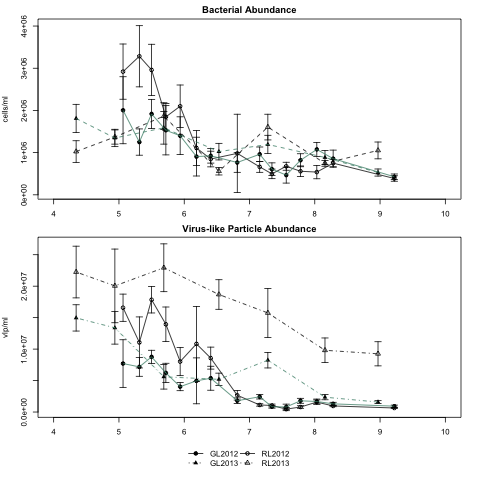

In [21]:
%%R
layout(matrix(c(1,2,3),3,1,byrow=TRUE),heights=c(15,15,3))
par(mar=c(2,4,2,2))
with(alldata, errbar(month.day, bac, yplus=bac+bac.sd, yminus=bac-bac.sd, col=lycol[lake.year],pch=lypch[lake.year], ylab="cells/ml",xlab="Month", xlim=c(4,10)))
title(main="Bacterial Abundance")
with(r12bac, lines(month.day, bac, col="black",lty=1, lwd=1))
with(g12bac, lines(month.day, bac, col="aquamarine4",lty=1, lwd=1))
with(r13bac, lines(month.day, bac, col="black",lty=2, lwd=1))
with(g13bac, lines(month.day, bac, col="aquamarine4",lty=2, lwd=1))
with(alldata, errbar(month.day, vlp, yplus=vlp+vlp.sd, yminus=vlp-vlp.sd, col=lycol[lake.year],pch=lypch[lake.year], ylab="vlp/ml", xlab="Month", xlim=c(4,10)))
title(main="Virus-like Particle Abundance")
with(r12vlp, lines(month.day, vlp, col="black",lty=1, lwd=1))
with(g12vlp, lines(month.day, vlp, col="aquamarine4",lty=1, lwd=1))
with(r13vlp, lines(month.day, vlp, col="black",lty=4, lwd=1))
with(g13vlp, lines(month.day, vlp, col="aquamarine4",lty=4, lwd=1))

par(mar=c(0,0,0,0))
plot.new()
with(alldata, legend('center','groups', legend=levels(lake.year), pch=lypch,lty=c(1,4,1,4),lwd=1,col=lycol, bty="n",ncol=2))


In [22]:
%%R
png("./new_plots/TS.bacvircounts.png",    # create PNG        
    width = 4*200,        # 5 x 300 pixels
    height = 5*200,
    res = 300,            # 300 pixels per inch
    pointsize = 10)
layout(matrix(c(1,2,3),3,1,byrow=TRUE),heights=c(15,16,3))
par(mar=c(2,3,2,2))
# bacterial abundance
with(alldata, errbar(month.day, bac, yplus=bac+bac.sd, yminus=bac-bac.sd, col=lycol[lake.year],pch=lypch[lake.year], ylab="",xlab="", xlim=c(4,10)))
title(main="A", adj = 0, font.lab=2)
title(main="Bacterial Abundance", adj=1)
title(ylab="cells/mL", line=2, font.lab=2)
with(r12bac, lines(month.day, bac, col="black",lty=1, lwd=1))
with(g12bac, lines(month.day, bac, col="black",lty=1, lwd=1))
with(r13bac, lines(month.day, bac, col="black",lty=2, lwd=1))
with(g13bac, lines(month.day, bac, col="black",lty=2, lwd=1))

par(mar=c(3,3,2,2))
# vlp abundance
with(alldata, errbar(month.day, vlp, yplus=vlp+vlp.sd, yminus=vlp-vlp.sd, col=lycol[lake.year],pch=lypch[lake.year], ylab="", xlab="", xlim=c(4,10)))
title(main="B", adj = 0, font.lab=2)
title(main="Virus-like Particle Abundance", adj=1)
title(ylab="vlp/mL", line=2, font.lab=2)
title(xlab="Month", line=2, font.lab=2)
with(r12vlp, lines(month.day, vlp, col="black",lty=1, lwd=1))
with(g12vlp, lines(month.day, vlp, col="black",lty=1, lwd=1))
with(r13vlp, lines(month.day, vlp, col="black",lty=4, lwd=1))
with(g13vlp, lines(month.day, vlp, col="black",lty=4, lwd=1))

par(mar=c(0,0,0,0))
plot.new()
with(alldata, legend('center','groups', legend=levels(lake.year), pch=lypch,lty=c(1,4,1,4),lwd=1,col=lycol, bty="n",ncol=2))


dev.off()

quartz_off_screen 
                2 


In [23]:
!open ./new_plots/TS.bacvircounts.png -a Preview

### cyanobacterial and cyanophage types over time

In [6]:
%%R
alldata$bin1.cyanos<-log((alldata$bin1.cyanos+1), 10)
alldata$bin2.cyanos<-log((alldata$bin2.cyanos+1), 10)
alldata$bin3.cyanos<-log((alldata$bin3.cyanos+1), 10)
alldata$bin4.cyanos<-log((alldata$bin4.cyanos+1), 10)

alldata$log.rlcp1<-log((alldata$rlcp1+1),10)
alldata$log.rlcp2a<-log((alldata$rlcp2a+1),10)
alldata$log.rlcp4<-log((alldata$rlcp4+1),10)

In [7]:
%%R
rl.2012<-filter(alldata,Year==2012, lake=="RL")
rl.2013<-filter(alldata,Year==2013, lake=="RL")
gl.2012<-filter(alldata, Year==2012, lake=="GL")
gl.2013<-filter(alldata, Year==2013, lake=="GL")
all.2012<-filter(alldata,Year==2012)
all.2013<-filter(alldata,Year==2013)
rl.all<-filter(alldata,lake=="RL")
gl.all<-filter(alldata,lake=="GL")


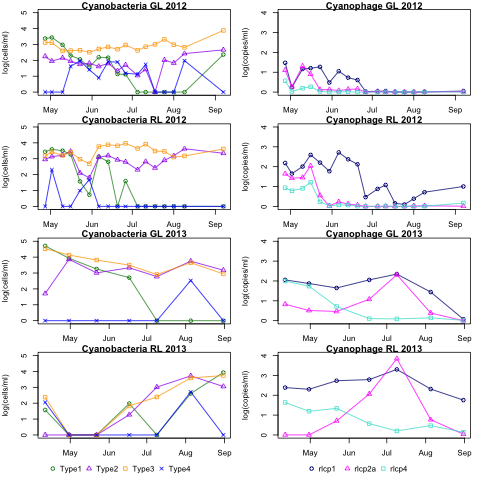

In [9]:
%%R
layout(matrix(c(1,2,3,4,5,6,7,8,9,10),5,2,byrow=TRUE),heights=c(15,15,15,15,3))
par(mar=c(2,4,1,1))
with(all.2012, plot(date,bin2.cyanos,type="n",ylim=c(0,5),xlab="Date",ylab="log(cells/ml)",main="Cyanobacteria GL 2012"))

# GL 2012
with(gl.2012,lines(date,bin1.cyanos, col="forestgreen"))
with(gl.2012, points(date,bin1.cyanos, pch=1, col="forestgreen"))
with(gl.2012,lines(date,bin2.cyanos, col="purple"))
with(gl.2012, points(date,bin2.cyanos, pch=2, col="purple"))
with(gl.2012,lines(date,bin3.cyanos, col="orange"))
with(gl.2012, points(date,bin3.cyanos, pch=0, col="orange"))
with(gl.2012,lines(date,bin4.cyanos, col="blue"))
with(gl.2012, points(date,bin4.cyanos, pch=4, col="blue"))

with(all.2012, plot(date,log.rlcp1,type="n", xlab="Date",ylim=c(0,4),ylab="log(copies/ml)",main="Cyanophage GL 2012"))
with(gl.2012,lines(date,log.rlcp1, col="navy"))
with(gl.2012, points(date,log.rlcp1, pch=1, col="navy"))
with(gl.2012,lines(date,log.rlcp2a, col="magenta"))
with(gl.2012, points(date,log.rlcp2a, pch=2, col="magenta"))
with(gl.2012,lines(date,log.rlcp4, col="turquoise"))
with(gl.2012, points(date,log.rlcp4, pch=0, col="turquoise"))

# RL 2012
with(all.2012, plot(date,bin3.cyanos,type="n",xlab="Date",ylim=c(0,5),ylab="log(cells/ml)",main="Cyanobacteria RL 2012"))
with(rl.2012, lines(date,bin1.cyanos,col="forestgreen"))
with(rl.2012, points(date,bin1.cyanos,pch=1, col="forestgreen"))
with(rl.2012, lines(date,bin2.cyanos,col="purple"))
with(rl.2012, points(date,bin2.cyanos,pch=2, col="purple"))
with(rl.2012, lines(date,bin3.cyanos,col="orange"))
with(rl.2012, points(date,bin3.cyanos,pch=0, col="orange"))
with(rl.2012, lines(date,bin4.cyanos,col="blue"))
with(rl.2012, points(date,bin4.cyanos,pch=4, col="blue"))

with(all.2012, plot(date,log.rlcp1,type="n", xlab="Date",ylim=c(0,4),ylab="log(copies/ml)",main="Cyanophage RL 2012"))
with(rl.2012,lines(date,log.rlcp1, col="navy"))
with(rl.2012, points(date,log.rlcp1, pch=1, col="navy"))
with(rl.2012,lines(date,log.rlcp2a, col="magenta"))
with(rl.2012, points(date,log.rlcp2a, pch=2, col="magenta"))
with(rl.2012,lines(date,log.rlcp4, col="turquoise"))
with(rl.2012, points(date,log.rlcp4, pch=0, col="turquoise"))

# GL 2013
with(all.2013, plot(date,bin1.cyanos,type="n", ylim=c(0,5), xlab="Date",ylab="log(cells/ml)",main="Cyanobacteria GL 2013"))
with(gl.2013,lines(date,bin1.cyanos, col="forestgreen"))
with(gl.2013, points(date,bin1.cyanos, pch=1, col="forestgreen"))
with(gl.2013,lines(date,bin2.cyanos, col="purple"))
with(gl.2013, points(date,bin2.cyanos, pch=2, col="purple"))
with(gl.2013,lines(date,bin3.cyanos, col="orange"))
with(gl.2013, points(date,bin3.cyanos, pch=0, col="orange"))
with(gl.2013,lines(date,bin4.cyanos, col="blue"))
with(gl.2013, points(date,bin4.cyanos, pch=4, col="blue"))

with(all.2013, plot(date,log.rlcp2a,type="n", ylim=c(0,4),xlab="Date",ylab="log(copies/ml)",main="Cyanophage GL 2013"))
with(gl.2013,lines(date,log.rlcp1, col="navy"))
with(gl.2013, points(date,log.rlcp1, pch=1, col="navy"))
with(gl.2013,lines(date,log.rlcp2a, col="magenta"))
with(gl.2013, points(date,log.rlcp2a, pch=2, col="magenta"))
with(gl.2013,lines(date,log.rlcp4, col="turquoise"))
with(gl.2013, points(date,log.rlcp4, pch=0, col="turquoise"))

# RL 2013
with(all.2013, plot(date,bin1.cyanos,type="n", ylim=c(0,5), xlab="Date",ylab="log(cells/ml)",main="Cyanobacteria RL 2013"))
with(rl.2013, lines(date,bin1.cyanos,col="forestgreen"))
with(rl.2013, points(date,bin1.cyanos,pch=1, col="forestgreen"))
with(rl.2013, lines(date,bin2.cyanos,col="purple"))
with(rl.2013, points(date,bin2.cyanos,pch=2, col="purple"))
with(rl.2013, lines(date,bin3.cyanos,col="orange"))
with(rl.2013, points(date,bin3.cyanos,pch=0, col="orange"))
with(rl.2013, lines(date,bin4.cyanos,col="blue"))
with(rl.2013, points(date,bin4.cyanos,pch=4, col="blue"))

with(all.2013, plot(date,log.rlcp2a,type="n", ylim=c(0,4), xlab="Date",ylab="log(copies/ml)",main="Cyanophage RL 2013"))
with(rl.2013,lines(date,log.rlcp1, col="navy"))
with(rl.2013, points(date,log.rlcp1, pch=1, col="navy"))
with(rl.2013,lines(date,log.rlcp2a, col="magenta"))
with(rl.2013, points(date,log.rlcp2a, pch=2, col="magenta"))
with(rl.2013,lines(date,log.rlcp4, col="turquoise"))
with(rl.2013, points(date,log.rlcp4, pch=0, col="turquoise"))

par(mar=c(0, 0, 0, 0))
plot.new()
legend('center','groups',c("Type1","Type2","Type3","Type4"),pch=c(1,2,0,4),
       col=c("forestgreen","purple","orange","blue"),ncol=4,bty ="n")
par(mar=c(0, 0, 0, 0))
plot.new()
legend('center','groups',c("rlcp1","rlcp2a","rlcp4"),pch=c(1,2,0),
       col=c("navy","magenta","turquoise"),ncol=3,bty ="n")

In [ ]:
%%R
png("Cyano.cyphage.types.logabund.png",    
    width = 8*200,        # 5 x 300 pixels
    height = 11*200,
    res = 300,            # 300 pixels per inch
    pointsize = 14)

layout(matrix(c(1,2,3,4,5,6,7,8,9,10),5,2,byrow=TRUE),heights=c(15,15,15,15,3))
par(mar=c(2,4,1,1))
with(all.2012, plot(date,bin2.cyanos,type="n",ylim=c(0,5),xlab="Date",ylab="log(cells/ml)",main="Cyanobacteria GL 2012"))
with(gl.2012,lines(date,bin1.cyanos, col="forestgreen"))
with(gl.2012, points(date,bin1.cyanos, pch=19, col="forestgreen"))
with(gl.2012,lines(date,bin2.cyanos, col="purple"))
with(gl.2012, points(date,bin2.cyanos, pch=19, col="purple"))
with(gl.2012,lines(date,bin3.cyanos, col="orange"))
with(gl.2012, points(date,bin3.cyanos, pch=19, col="orange"))
with(gl.2012,lines(date,bin4.cyanos, col="blue"))
with(gl.2012, points(date,bin4.cyanos, pch=19, col="blue"))
#gl 2012
with(all.2012, plot(date,log.rlcp1,type="n", xlab="Date",ylim=c(0,4),ylab="log(copies/ml)",main="Cyanophage GL 2012"))
with(gl.2012,lines(date,log.rlcp1, col="navy"))
with(gl.2012, points(date,log.rlcp1, pch=18, col="navy"))
with(gl.2012,lines(date,log.rlcp2a, col="magenta"))
with(gl.2012, points(date,log.rlcp2a, pch=18, col="magenta"))
with(gl.2012,lines(date,log.rlcp4, col="turquoise"))
with(gl.2012, points(date,log.rlcp4, pch=18, col="turquoise"))
#RL 2012
with(all.2012, plot(date,bin3.cyanos,type="n",xlab="Date",ylim=c(0,5),ylab="log(cells/ml)",main="Cyanobacteria RL 2012"))
with(rl.2012, lines(date,bin1.cyanos,col="forestgreen"))
with(rl.2012, points(date,bin1.cyanos,pch=19, col="forestgreen"))
with(rl.2012, lines(date,bin2.cyanos,col="purple"))
with(rl.2012, points(date,bin2.cyanos,pch=19, col="purple"))
with(rl.2012, lines(date,bin3.cyanos,col="orange"))
with(rl.2012, points(date,bin3.cyanos,pch=19, col="orange"))
with(rl.2012, lines(date,bin4.cyanos,col="blue"))
with(rl.2012, points(date,bin4.cyanos,pch=19, col="blue"))

with(all.2012, plot(date,log.rlcp1,type="n", xlab="Date",ylim=c(0,4),ylab="log(copies/ml)",main="Cyanophage RL 2012"))
with(rl.2012,lines(date,log.rlcp1, col="navy"))
with(rl.2012, points(date,log.rlcp1, pch=18, col="navy"))
with(rl.2012,lines(date,log.rlcp2a, col="magenta"))
with(rl.2012, points(date,log.rlcp2a, pch=18, col="magenta"))
with(rl.2012,lines(date,log.rlcp4, col="turquoise"))
with(rl.2012, points(date,log.rlcp4, pch=18, col="turquoise"))
#GL 2013
with(all.2013, plot(date,bin1.cyanos,type="n", ylim=c(0,5), xlab="Date",ylab="log(cells/ml)",main="Cyanobacteria GL 2013"))
with(gl.2013,lines(date,bin1.cyanos, col="forestgreen"))
with(gl.2013, points(date,bin1.cyanos, pch=19, col="forestgreen"))
with(gl.2013,lines(date,bin2.cyanos, col="purple"))
with(gl.2013, points(date,bin2.cyanos, pch=19, col="purple"))
with(gl.2013,lines(date,bin3.cyanos, col="orange"))
with(gl.2013, points(date,bin3.cyanos, pch=19, col="orange"))
with(gl.2013,lines(date,bin4.cyanos, col="blue"))
with(gl.2013, points(date,bin4.cyanos, pch=19, col="blue"))

with(all.2013, plot(date,log.rlcp2a,type="n", ylim=c(0,4),xlab="Date",ylab="log(copies/ml)",main="Cyanophage GL 2013"))
with(gl.2013,lines(date,log.rlcp1, col="navy"))
with(gl.2013, points(date,log.rlcp1, pch=18, col="navy"))
with(gl.2013,lines(date,log.rlcp2a, col="magenta"))
with(gl.2013, points(date,log.rlcp2a, pch=18, col="magenta"))
with(gl.2013,lines(date,log.rlcp4, col="turquoise"))
with(gl.2013, points(date,log.rlcp4, pch=18, col="turquoise"))

with(all.2013, plot(date,bin1.cyanos,type="n", ylim=c(0,5), xlab="Date",ylab="log(cells/ml)",main="Cyanobacteria RL 2013"))
with(rl.2013, lines(date,bin1.cyanos,col="forestgreen"))
with(rl.2013, points(date,bin1.cyanos,pch=19, col="forestgreen"))
with(rl.2013, lines(date,bin2.cyanos,col="purple"))
with(rl.2013, points(date,bin2.cyanos,pch=19, col="purple"))
with(rl.2013, lines(date,bin3.cyanos,col="orange"))
with(rl.2013, points(date,bin3.cyanos,pch=19, col="orange"))
with(rl.2013, lines(date,bin4.cyanos,col="blue"))
with(rl.2013, points(date,bin4.cyanos,pch=19, col="blue"))


with(all.2013, plot(date,log.rlcp2a,type="n", ylim=c(0,4), xlab="Date",ylab="log(copies/ml)",main="Cyanophage RL 2013"))
with(rl.2013,lines(date,log.rlcp1, col="navy"))
with(rl.2013, points(date,log.rlcp1, pch=18, col="navy"))
with(rl.2013,lines(date,log.rlcp2a, col="magenta"))
with(rl.2013, points(date,log.rlcp2a, pch=18, col="magenta"))
with(rl.2013,lines(date,log.rlcp4, col="turquoise"))
with(rl.2013, points(date,log.rlcp4, pch=18, col="turquoise"))

par(mar=c(0, 0, 0, 0))
plot.new()
legend('center','groups',c("Type1","Type2","Type3","Type4"),pch=19,
       col=c("forestgreen","purple","orange","blue"),ncol=4,bty ="n")
par(mar=c(0, 0, 0, 0))
plot.new()
legend('center','groups',c("rlcp1","rlcp2a","rlcp4"),pch=18,
       col=c("navy","magenta","turquoise"),ncol=3,bty ="n")

dev.off()

In [13]:
%%R
pchlist <- c(1,2,0,4)
print(pchlist[3])

[1] 0


In [53]:
%%R

pchlist <- c(1,2,0,4)
ltylist <- c(1,3,4,2)
#bcol <- c("forestgreen", "purple", "orange", "blue")
bcol <- c("black", "black", "black")
cppch <- c(1,2,0)
cplty <- c(1,3,4)
pcol <- c("navy", "magenta", "turquoise")

png("./new_plots/Cyano.cyphage.types.logabund.png",    
    width = 9*200,        # 5 x 300 pixels
    height = 11*200,
    res = 300,            # 300 pixels per inch
    pointsize = 12)

layout(matrix(c(1,2,3,4,5,6,7,8,9,10),5,2,byrow=TRUE),widths=c(10,10), heights=c(17,15,15,15,5))
par(mar=c(2,3,3,1))

# GL 2012
with(all.2012, plot(date,bin2.cyanos,type="n",ylim=c(0,5), ylab=""))
title(main="A", adj = 0, line=0.5)
title(main="Cyanobacteria", line=1)
title(main="GL 2012", adj = 1, line=-1)
title(ylab="log(cells/ml)", line=2)
with(gl.2012,lines(date,bin1.cyanos, col=bcol[1], lty=ltylist[1]))
with(gl.2012, points(date,bin1.cyanos, pch=pchlist[1], col=bcol[1]))
with(gl.2012,lines(date,bin2.cyanos, col=bcol[2], lty=ltylist[2]))
with(gl.2012, points(date,bin2.cyanos, pch=pchlist[2], col=bcol[2]))
with(gl.2012,lines(date,bin3.cyanos, col=bcol[3], lty=ltylist[3]))
with(gl.2012, points(date,bin3.cyanos, pch=pchlist[3], col=bcol[3]))
with(gl.2012,lines(date,bin4.cyanos, col=bcol[4], lty=ltylist[4]))
with(gl.2012, points(date,bin4.cyanos, pch=pchlist[4], col=bcol[4]))

with(all.2012, plot(date,log.rlcp1,type="n", ylim=c(0,4), ylab=""))
title(main="E", adj = 0, line=0.5)
title(main="GL 2012", adj=1, line=-1)
title(main="Cyanophage", line=1)
title(ylab="log(copies/ml)", line=2)
with(gl.2012,lines(date,log.rlcp1, col=pcol[1], lty=cplty[1]))
with(gl.2012, points(date,log.rlcp1, pch=cppch[1], col=pcol[1]))
with(gl.2012,lines(date,log.rlcp2a, col=pcol[2], lty=cplty[2]))
with(gl.2012, points(date,log.rlcp2a, pch=cppch[2], col=pcol[2]))
with(gl.2012,lines(date,log.rlcp4, col=pcol[3], lty=cplty[3]))
with(gl.2012, points(date,log.rlcp4, pch=cppch[3], col=pcol[3]))

par(mar=c(2,3,1,1))
# RL 2012
with(all.2012, plot(date,bin3.cyanos,type="n", ylim=c(0,5), ylab=""))
title(main="B", adj=0)
title(main="RL 2012", adj=1, line=-1)
title(ylab="log(cells/ml)", line=2)
with(rl.2012, lines(date,bin1.cyanos,col=bcol[1], lty=ltylist[1]))
with(rl.2012, points(date,bin1.cyanos,pch=pchlist[1], col=bcol[1]))
with(rl.2012, lines(date,bin2.cyanos,col=bcol[2], lty=ltylist[2]))
with(rl.2012, points(date,bin2.cyanos,pch=pchlist[2], col=bcol[2]))
with(rl.2012, lines(date,bin3.cyanos,col=bcol[3], lty=ltylist[3]))
with(rl.2012, points(date,bin3.cyanos,pch=pchlist[3], col=bcol[3]))
with(rl.2012, lines(date,bin4.cyanos,col=bcol[4], lty=ltylist[4]))
with(rl.2012, points(date,bin4.cyanos,pch=pchlist[4], col=bcol[4]))

with(all.2012, plot(date,log.rlcp1,type="n", ylim=c(0,4), ylab=""))
title(main="F", adj=0)
title(main="RL 2012", adj=1, line=-1)
title(ylab="log(copies/ml)", line=2)
with(rl.2012,lines(date,log.rlcp1, col=pcol[1], lty=cplty[1]))
with(rl.2012, points(date,log.rlcp1, pch=cppch[1], col=pcol[1]))
with(rl.2012,lines(date,log.rlcp2a, col=pcol[2], lty=cplty[2]))
with(rl.2012, points(date,log.rlcp2a, pch=cppch[2], col=pcol[2]))
with(rl.2012,lines(date,log.rlcp4, col=pcol[3], lty=cplty[3]))
with(rl.2012, points(date,log.rlcp4, pch=cppch[3], col=pcol[3]))

# GL 2013
with(all.2013, plot(date,bin1.cyanos,type="n", ylim=c(0,5), ylab=""))
title(main="C", adj=0)
title(main="GL 2013", adj=1, line=-1)
title(ylab="log(cells/ml)", line=2)
with(gl.2013,lines(date,bin1.cyanos, col=bcol[1], lty=ltylist[1]))
with(gl.2013, points(date,bin1.cyanos, pch=pchlist[1], col=bcol[1]))
with(gl.2013,lines(date,bin2.cyanos, col=bcol[2], lty=ltylist[2]))
with(gl.2013, points(date,bin2.cyanos, pch=pchlist[2], col=bcol[2]))
with(gl.2013,lines(date,bin3.cyanos, col=bcol[3], lty=ltylist[3]))
with(gl.2013, points(date,bin3.cyanos, pch=pchlist[3], col=bcol[3]))
with(gl.2013,lines(date,bin4.cyanos, col=bcol[4], lty=ltylist[4]))
with(gl.2013, points(date,bin4.cyanos, pch=pchlist[4], col=bcol[4]))

with(all.2013, plot(date,log.rlcp2a,type="n", ylim=c(0,4), ylab=""))
title(main="G", adj=0)
title(main="GL 2013", adj=1, line=-1)
title(ylab="log(copies/ml)", line=2)
with(gl.2013,lines(date,log.rlcp1, col=pcol[1], lty=cplty[1]))
with(gl.2013, points(date,log.rlcp1, pch=cppch[1], col=pcol[1]))
with(gl.2013,lines(date,log.rlcp2a, col=pcol[2], lty=cplty[2]))
with(gl.2013, points(date,log.rlcp2a, pch=cppch[2], col=pcol[2]))
with(gl.2013,lines(date,log.rlcp4, col=pcol[3], lty=cplty[3]))
with(gl.2013, points(date,log.rlcp4, pch=cppch[3], col=pcol[3]))

# RL 2013
with(all.2013, plot(date,bin1.cyanos, type="n", ylim=c(0,5), ylab=""))
title(main="D", adj=0)
title(main="RL 2013", adj=1,line=-1, font.lab=1)
title(ylab="log(cells/ml)", line=2)
with(rl.2013, lines(date,bin1.cyanos,col=bcol[1], lty=ltylist[1]))
with(rl.2013, points(date,bin1.cyanos,pch=pchlist[1], col=bcol[1]))
with(rl.2013, lines(date,bin2.cyanos,col=bcol[2], lty=ltylist[2]))
with(rl.2013, points(date,bin2.cyanos,pch=pchlist[2], col=bcol[2]))
with(rl.2013, lines(date,bin3.cyanos,col=bcol[3], lty=ltylist[3]))
with(rl.2013, points(date,bin3.cyanos,pch=pchlist[3], col=bcol[3]))
with(rl.2013, lines(date,bin4.cyanos,col=bcol[4], lty=ltylist[4]))
with(rl.2013, points(date,bin4.cyanos,pch=pchlist[4], col=bcol[4]))

with(all.2013, plot(date,log.rlcp2a,type="n", ylim=c(0,4), ylab=""))
title(main="H", adj=0)
title(main="RL 2013", adj=1, line=-1)
title(ylab="copies/ml", line=2)
with(rl.2013,lines(date,log.rlcp1, col=pcol[1], lty=cplty[1]))
with(rl.2013, points(date,log.rlcp1, pch=cppch[1], col=pcol[1]))
with(rl.2013,lines(date,log.rlcp2a, col=pcol[2], lty=cplty[2]))
with(rl.2013, points(date,log.rlcp2a, pch=cppch[2], col=pcol[2]))
with(rl.2013,lines(date,log.rlcp4, col=pcol[3], lty=cplty[3]))
with(rl.2013, points(date,log.rlcp4, pch=cppch[3], col=pcol[3]))

par(mar=c(0, 0, 0, 0))
plot.new()
legend('center','groups',c("Type1","Type2","Type3","Type4"),pch=pchlist, lty=ltylist,
       col=c(bcol[1],bcol[2],bcol[3],bcol[4]),ncol=1,bty ="n")
par(mar=c(0, 0, 0, 0))
plot.new()
legend('center','groups',c("rlcp1","rlcp2a","rlcp4"),pch=cppch, lty=cplty,
       col=c(pcol[1],pcol[2],pcol[3]),ncol=1,bty ="n")

dev.off()

quartz_off_screen 
                2 


In [2]:
!open ./new_plots/Cyano.cyphage.types.logabund.png -a Preview

### Working on cyanobacterial ITS tree... aka figure 5...

Location of the nwk file and data files created to make tree:
```
/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/ITS_BLAST_and_RocapReps.nwk
```

MEGA and alignment files also present in that directory.  Going to see if I can recreate this tree using R or python, and then re-label pertinent nodes with the proper symbols...

In [4]:
from ete3 import Tree, faces, TreeStyle, ImgFace, TextFace
import os

if os.path.exists("/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/new_plots/") == False:
    os.mkdir("/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/new_plots/")

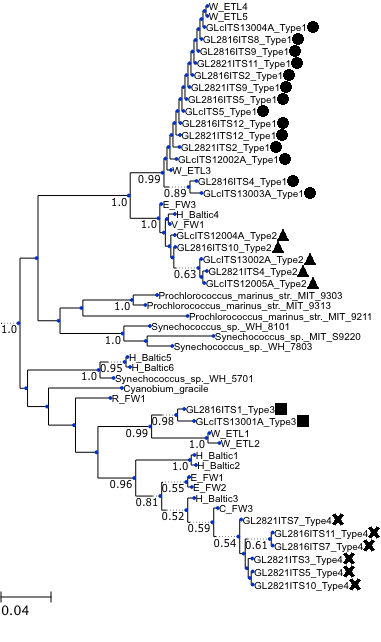

In [10]:
tree = Tree("/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/ITS_BLAST_and_RocapReps.nwk")


#create faces:
t1bw = "/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/type1_bw.png"
t1bface = faces.ImgFace(t1bw)

t1c =  "/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/type1_color.png"
t1cface = faces.ImgFace(t1c)

t2bw = "/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/type2_bw.png"
t2bface = faces.ImgFace(t2bw)

t2c = "/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/type2_color.png"
t2cface = faces.ImgFace(t2c)

t3bw = "/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/type3_bw.png"
t3bface = faces.ImgFace(t3bw)

t3c = "/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/type3_color.png"
t3cface = faces.ImgFace(t3c)

t4bw = "/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/type4_bw.png"
t4bface = faces.ImgFace(t4bw)

t4c = "/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/type4_color.png"
t4cface = faces.ImgFace(t4c)


ts = TreeStyle()
ts.show_leaf_name = True
#ts.legend.add_face(ImgFace(t1bw, "Type1"), column=0)
#ts.legend.add_face(ImgFace(t2bw, "Type2"), column=0)

for node in tree.traverse():
    if node.is_leaf():
        if "Type1" in node.name:
            node.add_face(ImgFace(t1bw, width=12), column=4, position="branch-right")
        if "Type2" in node.name:
            node.add_face(ImgFace(t2bw, width=12), column=4, position="branch-right")
        if "Type3" in node.name:
            node.add_face(ImgFace(t3bw, width=12), column=4, position="branch-right")
        if "Type4" in node.name:
            node.add_face(ImgFace(t4bw, width=12), column=4, position="branch-right")
    
    else:
        if node.support > 0.5:
            node.add_face(TextFace(node.support, fsize=10, fgcolor='black'), column=0, position="branch-bottom")
#class TextFace(text, ftype='Verdana', fsize=10, fgcolor='black', penwidth=0, fstyle='normal', tight_text=False, bold=False)
#t.render("mytree.png", w=183, units="mm")



tree.render("/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/new_plots/GLITS_bw.png", w=1000, units="px", dpi=1200)
tree.render("%%inline", tree_style=ts)

In [11]:
!open "/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/new_plots/GLITS_bw.png" -a Preview

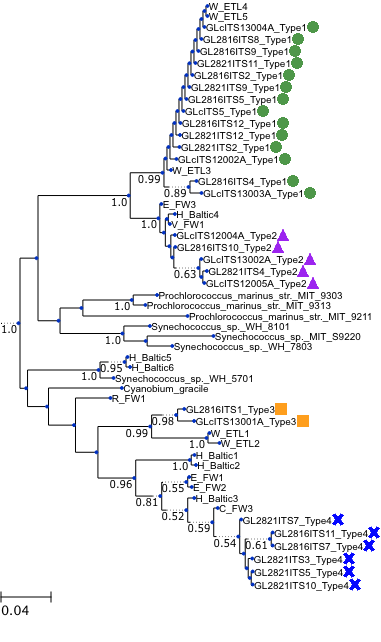

In [102]:
tree = Tree("/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/ITS_BLAST_and_RocapReps.nwk")

for node in tree.traverse():
    if node.is_leaf():
        if "Type1" in node.name:
            node.add_face(ImgFace(t1c, width=12), column=2, position="branch-right")
        if "Type2" in node.name:
            node.add_face(ImgFace(t2c, width=12), column=2, position="branch-right")
        if "Type3" in node.name:
            node.add_face(ImgFace(t3c, width=12), column=2, position="branch-right")
        if "Type4" in node.name:
            node.add_face(ImgFace(t4c, width=12), column=2, position="branch-right")
    
    else:
        if node.support > 0.5:
            node.add_face(TextFace(node.support, fsize=10, fgcolor='black'), column=0, position="branch-bottom")
tree.render("/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/new_plots/GLITS_col.png", w=500, units="px", dpi=300)            
tree.render("%%inline", tree_style=ts)

In [104]:
!open "/Users/juliambrown/Desktop/Thesis_Data/GLCyano_ITS/new_plots/GLITS_col.png" -a Preview

In [ ]:
alnmnt = "/Users/juliambrown/Desktop/Thesis_Data/g20/WC_Only_Manipulations/CuratedGLSeqs_wc_Only_wOG.fas"

In [105]:
!open "/Users/juliambrown/Desktop/Thesis_Data/g20/WC_Only_Manipulations/CuratedGLSeqs_wc_Only_wOG.fas" -a textedit